# Airbnb Seattle Dataset

In [331]:
#importing necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sb
import missingno as msno  
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


## (1) Business understanding


### The aim of this project is to analyze Seattle Airbnb data for Udadcity Nanodegree Program. Many of the approaches and code I use here can be applied to different Airbnb datasets. You can have a look at my medium post regarding the analysis of Seattle Airbnb dataset.

### This Project answers three main questions as follows:

### (1) Which neighborhoods have the highest number of listings? Among all Seattle's neighborhoods, Analysing the dataset shows that Capitol Hill, Downtown and Central Area are the highest neighborhoods in the number of listings.
### (2) Which neighborhoods have the highest listing prices? Magnolia, Downtown and Queen Ann are the top three neighborhoods with the most expensive listings prices.
### (3) Which neighborhoods have the highest rating review scores? Although the rating review scores are quite similar to almost all neighborhoods, Interbay, Central Area and Seward Park have slightly higher reveiw scores.

## (2) Data Understanding

### (2.1) Gather data

In [332]:
df = pd.read_csv('listings.csv')# reading the dataset and loading it to df

df.head()# displaying the first five rows in the dataset

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [333]:
df.columns #display list of columns in the dataset

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### (2.2.) Check columns information (i.e. number of missing values, and data type consistency) 

In [334]:
df.shape

(3818, 92)

In [335]:
df.info() #display columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [336]:
df['id'].nunique() #check how many unique ids in the dataset to mak sure no duplicate rows

3818

### (2.2.1) Visualizing the missing data in the dataset

In [337]:
(df.isnull().sum()/3818)*100 #Check the proportion of missing values in all columns

id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
                                      ...    
cancellation_policy                  0.000000
require_guest_profile_picture        0.000000
require_guest_phone_verification     0.000000
calculated_host_listings_count       0.000000
reviews_per_month                   16.422211
Length: 92, dtype: float64

<AxesSubplot:>

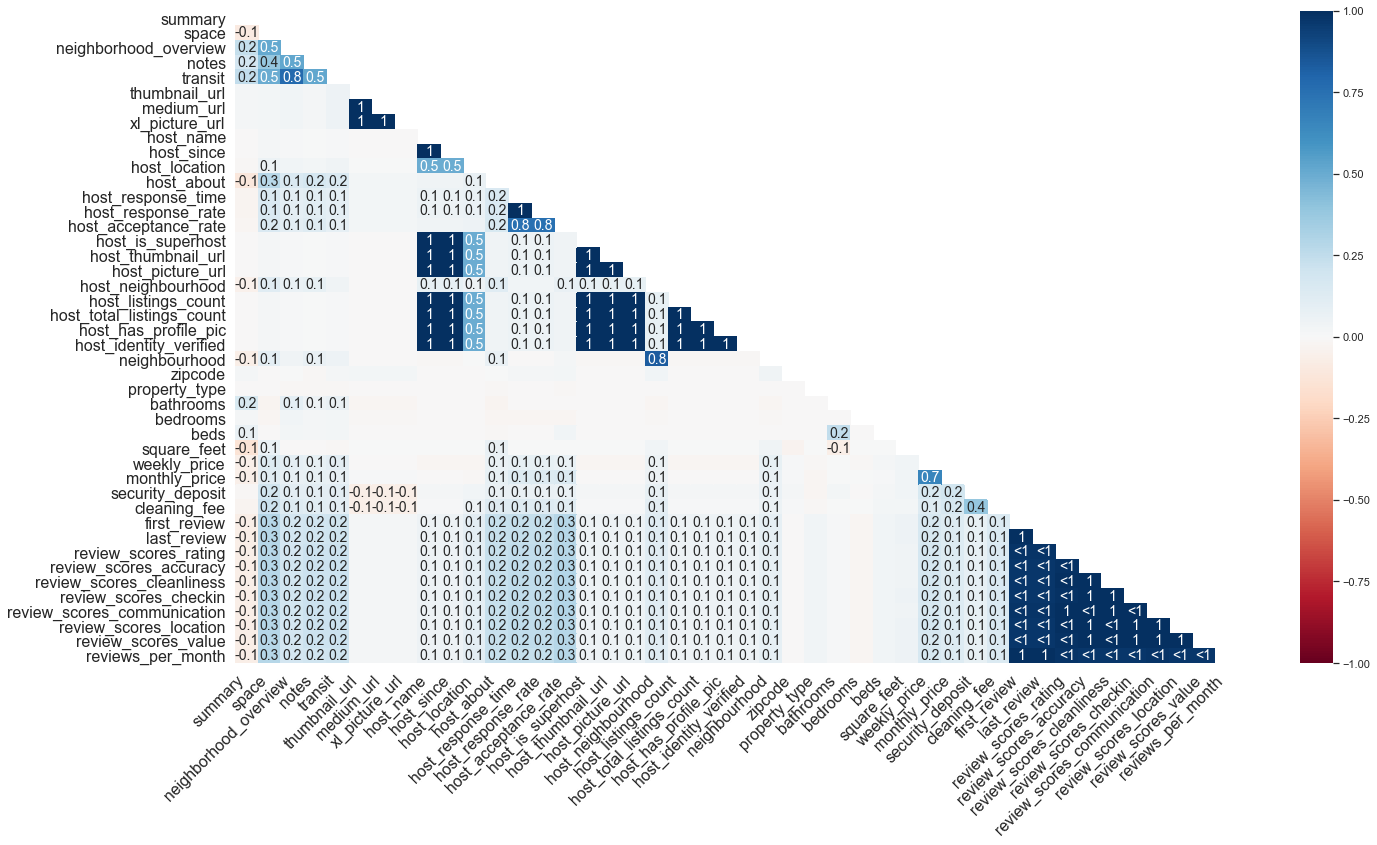

In [338]:
msno.heatmap(df)

In [ ]:

msno.dendrogram(df)

<AxesSubplot:>

In [ ]:
df['property_type'].isnull().sum()

In [ ]:
df['neighbourhood'].nunique()

In [ ]:
df['longitude'].isnull().sum()

In [ ]:
df['latitude'].isnull().sum()

In [ ]:
df['bathrooms'].isnull().sum()

In [ ]:
df['neighbourhood_cleansed']

In [ ]:
df['neighbourhood']

## (3) Data Cleaning

### (3.1) Drop all unnecessary columns to our data analysis

In [ ]:
#drop all columns that are unnecessary for our analysis and for answering our questions about the dataset
df.drop(['summary','space','notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url','last_review','first_review','cleaning_fee','security_deposit','monthly_price', 'weekly_price','square_feet','host_has_profile_pic','host_identity_verified', 'host_name',
       'host_since', 'host_location', 'host_about', 'neighbourhood','host_neighbourhood','neighborhood_overview', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'zipcode',
       'host_listings_count', 'host_total_listings_count','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license','reviews_per_month'],axis=1,inplace=True)

### (3.2) Drop rows with null values

In [ ]:
df  = df.dropna(subset=['property_type'], axis=0) # drop the only row with null value in this column

### (3.3) Fill columns with null values with 0 (i.e. number of bathrooms, bedrooms, beds, etc...)

In [ ]:
df['review_scores_rating'].fillna(0,inplace=True)# replacing all null values in review score with 0 as no score is available

In [ ]:
df['bathrooms'].fillna(0,inplace=True)# replacing all null values in bathrooms with 0s instead of removing the rows 

In [ ]:
df['bathrooms'].isnull().sum()

In [ ]:
df['bedrooms'].fillna(0,inplace=True)# replacing all null values in bedrooms with 0s instead of removing the rows 

In [ ]:
df['beds'].fillna(0,inplace=True)# replacing all null values in beds with 0s instead of removing the rows 

In [ ]:
#Check if all features have no null values
df.info()

In [ ]:
df.isnull().sum()

### (3.4) remove all characters from numerical columns (ie. extra_people and price) and changing the datatype to float64

In [ ]:
df['extra_people'] = df['extra_people'].str.replace('$','') 

In [ ]:
df['extra_people'] = df['extra_people'].str.replace(',','')

In [ ]:
df['extra_people'] = df['extra_people'].astype('float64')

In [ ]:
df['price'] = df['price'].str.replace('$','')

In [ ]:
df['price'] = df['price'].str.replace(',','')

In [ ]:
df['price'] = df['price'].astype('float64')

### (3.5) Visualizing the dataset after dealing with missing values

In [ ]:
df.info()

In [ ]:
(df.isnull().sum()/3818)*100 #Check the proportion of missing values in all columns

In [ ]:
msno.heatmap(df)

In [ ]:
msno.dendrogram(df)

### (3.4) Save the dataset to a new csv file

In [ ]:
df.to_csv("airbnb_listings.csv")

## (4) Analyzing and visualizing the dataset

In [ ]:
df = pd.read_csv('airbnb_listings.csv')# read the clean dataset and store it in df

df.head() # displaying the first five rows of the clean dataset

In [ ]:
df.shape

In [ ]:
df.columns

## (4.1) find the correlation matrix between features in the dataset

In [ ]:
features_response = ['price','accommodates','bathrooms','bedrooms','beds','guests_included','review_scores_rating','calculated_host_listings_count']


In [ ]:
corr = df[features_response].corr()
corr

In [ ]:
sb.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, center = 0)

## (4.2) find the top 10 hosts with higher number of listings in seattle

In [ ]:
top_host = df['host_id'].value_counts().head(10)

In [ ]:
def bar_plot(plot_data, plot_legend, plot_rot, plot_xlabel, plot_ylabel, plot_title):
    
    '''Takes in data for plotting, legend which can be True or False, the degree of rotating the plot,
    the xlabel the ylabel and the title of the plot and displays a bar plot'''
    plot_data.plot.bar(legend = plot_legend, rot = plot_rot)
    plt.xlabel(plot_xlabel)
    plt.ylabel(plot_ylabel)
    plt.title(plot_title)
    
 
bar_plot(top_host, False, 45, 'Host IDs', 'Number of Listings', 'Top 10 host with the most number of listings in Seattle')   
    


## (4.3) Find neighborhoods with the highest number of listings in Seattle

In [ ]:
neighbourhood = df['neighbourhood_group_cleansed'].value_counts()
neighbourhood = neighbourhood.drop(['Other neighborhoods'])
neighbourhood

In [ ]:

bar_plot(neighbourhood, False, 75, 'Neighbourhood', 'Number of Listings', 'Top 10 neighbourhoods with the most number of listings in Seattle')   


## (4.4) Find the count of different property types in the top three neighborhoods¶

In [ ]:
top_3 = neighbourhood.index[:3].tolist()
top_3

In [ ]:
bar_df = pd.DataFrame(df.loc[df['neighbourhood_group_cleansed'].isin(top_3) ].groupby(['neighbourhood_group_cleansed', 'property_type']).count()['id']).reset_index()
property_list = bar_df.property_type.unique().tolist()

bar_data = []

for property_type in property_list:
        bar = go.Bar(name = property_type, x= top_3, y =bar_df[bar_df['property_type']== property_type]['id'].tolist())
        bar_data.append(bar)
        
bar_layout = go.Layout(title = 'Property Type Count in Top 3 Most Neighborhoods with higher number of listings',
                   barmode = 'stack',
                  yaxis = dict(title='Count'))    
    
bar_fig = go.Figure(data=bar_data, layout=bar_layout)

bar_fig.show()

## (4.5) Find distripution of listings in the different neighborhoods

In [ ]:
coord =df.loc[:,['longitude','latitude']]
coord.describe() 

In [ ]:
range_ = np.random.RandomState(0)
colors = range_.rand(17)
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (47.505088, 47.733358,-122.417219, -122.252230)
neighborhood_groups = df.groupby('neighbourhood_group_cleansed')
for name,neighborhood_group in neighborhood_groups :
    plt.scatter(neighborhood_group['latitude'],neighborhood_group['longitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

In [ ]:
plt.figure(figsize=(28,13))
plt.style.use('fivethirtyeight')
BBox = (-122.448899, -122.20900, 47.487889, 47.73999)
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca
groups = df.groupby('neighbourhood_group_cleansed')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()


## (4.6) Heatmap of Seattle showing the distripbution of listings

In [ ]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([47.629382,-122.333180],zoom_start=11.4)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)


## (4.7) Find the proportion of the different property types accross Seattle

In [ ]:
df['property_type'].value_counts()

In [ ]:
labels = df.property_type.value_counts().index
colors = ['#880080', '#ff0000','#00ff00','#0000ff','#ffff00','#00ffff','#ff00ff','#c0c0c0','#808080','#800000','#808000','#008000','#800080','#008080','#000080','#000000']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
shape = df.property_type.value_counts().values
plt.figure(figsize=(18,18))
plt.pie(shape, colors= colors, startangle=0)
plt.legend(labels)
plt.title('Property types')
plt.show()

In [ ]:
property_= df['property_type'].value_counts()
sb.set(rc={'figure.figsize':(10,8)})
viz_bar = property_.plot(kind='bar')
viz_bar.set_title('Number of different property types in Seattle')
viz_bar.set_xlabel('Types of property')
viz_bar.set_ylabel('Count of property types')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45);

## (4.7) Average rating score of listing in different neighborhoods

In [ ]:
avgScorePerNeighborhood = df.groupby('neighbourhood_group_cleansed').agg({'review_scores_rating':np.mean})
avgScorePerNeighborhood = avgScorePerNeighborhood.apply(lambda x: x.sort_values(ascending=False).head(15))
avgScorePerNeighborhood.plot.bar(figsize=(10,4), legend = False)



In [ ]:
avgScorePerNeighborhood

## (4.9) map showing the review score of listings in the different neighborhoods in Seattle

In [ ]:
plt.figure(figsize=(28,14))
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=2,extent=BBox)
ax = plt.gca()
df.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='review_scores_rating', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

## (4.9) map showing the price of listings in the different neighborhoods in Seattle

In [ ]:
plt.figure(figsize=(28,14))
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=2,extent=BBox)
ax = plt.gca()
df.plot(kind='scatter',y='latitude',x='longitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
vis = sb.boxplot(y='price',x='neighbourhood_group_cleansed',data = df)
plt.title('Neighbourhood Group Price Distribution')
plt.xlabel('Neighbourhood groups')
vis.set_xticklabels(vis.get_xticklabels(), rotation=45)
plt.show()


In [ ]:
avgPricePerNeighbourhood = df.groupby('neighbourhood_group_cleansed').agg({'price':np.mean})
avgPricePerNeighbourhood = avgPricePerNeighbourhood.apply(lambda x: x.sort_values(ascending=False).head(15))
avgPricePerNeighbourhood

## (4.10) Word cloud of customers reviews for Seattle listings

In [ ]:
df_review = pd.read_csv('reviews.csv')
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df_review.comments)
word_cloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()